In [1]:
import numpy as np
import sklearn.model_selection as skm
import matplotlib.pyplot as plt
%matplotlib inline
import sys
from imblearn.over_sampling import SMOTE


In [2]:
x = np.random.rand(300, 10)
y = np.random.rand(300,1)

In [3]:
# Train test split
train_test_ratio = 0.8
x_train, x_test, y_train, y_test = skm.train_test_split(x, y, train_size = train_test_ratio)

In [4]:
# If there is an unbalanced important binary variables
# smote = SMOTE(sampling_strategy=0.5)
# rand_sampler = RandomUnderSampler(sampling_strategy=0.3)
# pipeline = Pipeline(steps=[smote, rand_sampler])
# X, y = pipeline.fit_resample(X, y)
# other_variables = X.drop(columns='unbalanced_variable')
# other_variables, X('unbalanced_variable') = smote.fit_sample(other_variables, unbalanced_variable)

In [5]:
# Train folding (cross-val)
n_folding = 10
x_train_folding = np.split(x_train, n_folding) # you can access each subarray using X_train_folding[i]
y_train_folding = np.split(y_train, n_folding)

In [6]:
parameters = [x for x in range(10)]
mse_report = np.zeros((len(parameters), n_folding))

for i in range(n_folding):
    for j, par in enumerate(parameters):
        #create x y
        #fit model on every fold as train except i as test
        #model predict
        mse_report[j, i] = np.random.randint(100) # evalutate(y, y_hat)
        
print(mse_report)

[[ 0. 11. 92. 85.  5. 48. 11. 63. 55. 74.]
 [87. 39. 59. 12. 54. 96. 85. 15. 34. 22.]
 [31. 83. 78. 22. 36.  7. 12. 23. 98. 35.]
 [68. 38. 70. 84. 87. 54. 61. 32. 38. 91.]
 [35. 89. 30. 66.  6. 56. 12. 65. 87.  3.]
 [15. 15. 86. 75. 58. 50. 36. 28. 26. 34.]
 [83. 42. 41. 28. 49.  9. 48.  7. 52. 64.]
 [40. 66. 14. 15. 23. 77. 20. 68. 30. 85.]
 [36. 12. 97.  7. 65. 83. 40. 62. 94. 55.]
 [32. 52.  4. 50. 91. 58. 32. 54.  9.  3.]]


In [7]:
mu_perf = np.mean(mse_report, axis=1)
print(mu_perf)

[44.4 50.3 42.5 62.3 44.9 42.3 42.3 43.8 55.1 38.5]


In [8]:
std_perf = np.std(mse_report, axis=1)
print(std_perf)

[33.19096263 29.38724213 30.33562262 20.41102643 30.59558792 23.13892824
 22.04563449 26.07604264 29.92808046 26.63925675]


In [9]:
max_perf = np.max(mse_report, axis=1)
print(max_perf)

[92. 96. 98. 91. 89. 86. 83. 85. 97. 91.]


In [10]:
min_perf = np.min(mse_report, axis=1)
print(min_perf)

[ 0. 12.  7. 32.  3. 15.  7. 14.  7.  3.]


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1fe5e210>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1fe81750>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1fe6c150>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1fe6ce10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1fe886d0>,
 'means': []}

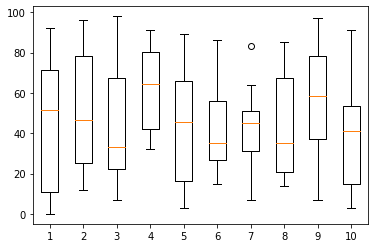

In [11]:
plt.boxplot(mse_report.T)